<a href="https://colab.research.google.com/github/tyler999x/TuanAnh_Lab2_Regression/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [2]:
# Loading pre-defined Wine Dataset 
wine_dataset = datasets.load_wine() 
print(wine_dataset.DESCR) 

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

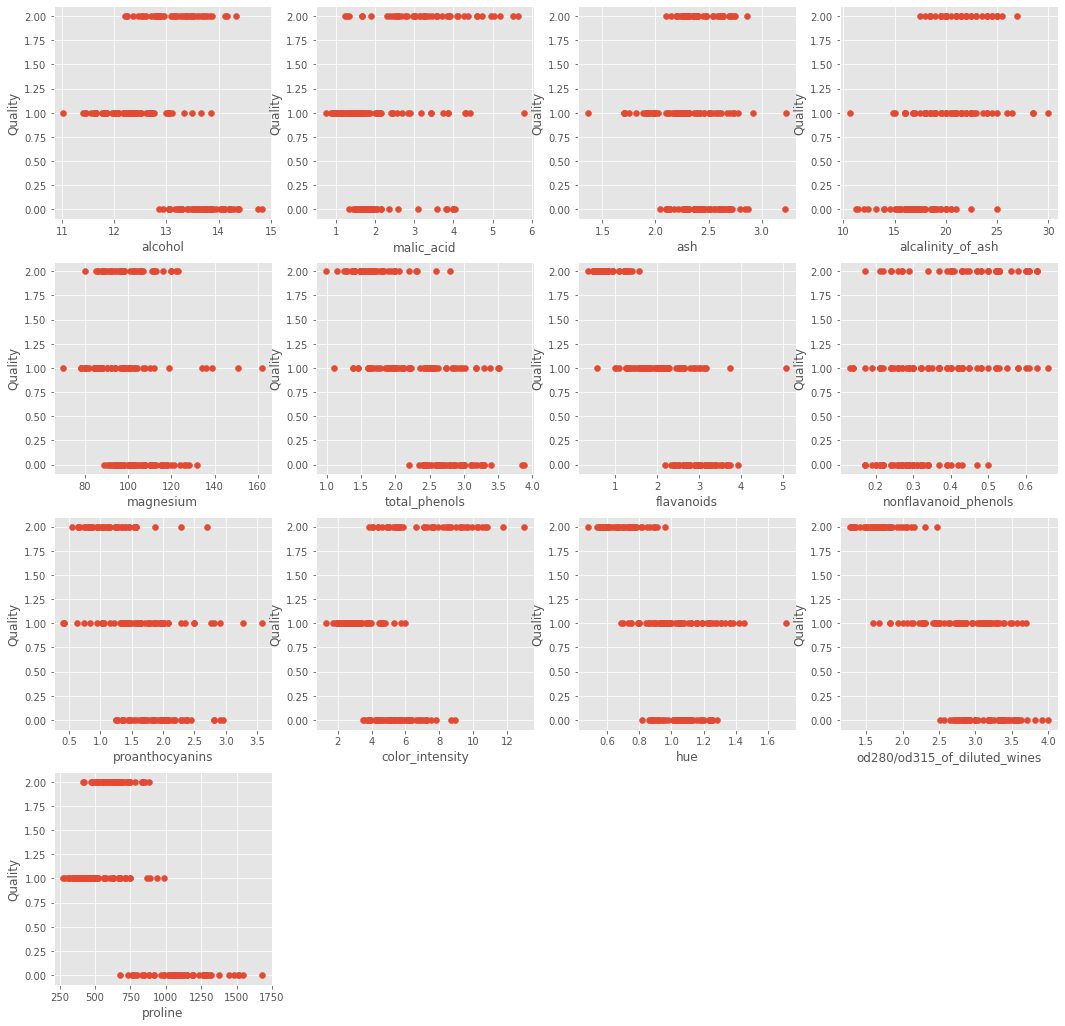

In [3]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(wine_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(wine_dataset.data[:, index], wine_dataset.target) 
    ax.set_ylabel('Quality', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 
  
plt.show() 

In [4]:
# Load the dataset into Pandas Dataframe 
wine_pd = pd.DataFrame(wine_dataset.data) 
wine_pd.columns = wine_dataset.feature_names 
wine_pd_target = np.asarray(wine_dataset.target) 
wine_pd['Quality'] = pd.Series(wine_pd_target) 
  
# input  
X = wine_pd.iloc[:, :-1] 
  
#output 
Y = wine_pd.iloc[:, -1] 
  
print(wine_pd.head(178)) 

     alcohol  malic_acid   ash  ...  od280/od315_of_diluted_wines  proline  Quality
0      14.23        1.71  2.43  ...                          3.92   1065.0        0
1      13.20        1.78  2.14  ...                          3.40   1050.0        0
2      13.16        2.36  2.67  ...                          3.17   1185.0        0
3      14.37        1.95  2.50  ...                          3.45   1480.0        0
4      13.24        2.59  2.87  ...                          2.93    735.0        0
..       ...         ...   ...  ...                           ...      ...      ...
173    13.71        5.65  2.45  ...                          1.74    740.0        2
174    13.40        3.91  2.48  ...                          1.56    750.0        2
175    13.27        4.28  2.26  ...                          1.56    835.0        2
176    13.17        2.59  2.37  ...                          1.62    840.0        2
177    14.13        4.10  2.74  ...                          1.60    560.0  

In [5]:
x_train, x_test, y_train, y_test = train_test_split( 
    wine_pd.iloc[:, :-1], wine_pd.iloc[:, -1],  
    test_size = 0.25,random_state=178) 
  
print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

Train data shape of X = (133, 13) and Y = (133,) : 
Test data shape of X = (45, 13) and Y = (45,) : 


In [6]:
from sklearn import metrics
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print('RMSE of Linear Regression', np.sqrt(metrics.mean_squared_error(y_test, lreg_y_pred)))
print("Residual sum of squares: ", ((lreg_y_pred - y_test) ** 2).sum())
print(lreg_coefficient) 

Mean squared Error on test set :  0.07078148781456782
RMSE of Linear Regression 0.266047905112158
Residual sum of squares:  3.185166951655552
                         Columns  Coefficient Estimate
0                        alcohol             -0.083150
1                     malic_acid              0.026696
2                            ash             -0.137555
3              alcalinity_of_ash              0.036959
4                      magnesium             -0.001549
5                  total_phenols              0.167672
6                     flavanoids             -0.457175
7           nonflavanoid_phenols             -0.523423
8                proanthocyanins              0.087137
9                color_intensity              0.070702
10                           hue              0.020130
11  od280/od315_of_diluted_wines             -0.300989
12                       proline             -0.000659


In [7]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
# Train the model  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print("Mean squared Error on test set : ",mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print('RMSE of Ridge Regression', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Residual sum of squares: ", ((y_pred - y_test) ** 2).sum())
print(ridge_coefficient) 

Mean squared Error on test set :  0.06256367237803945
RMSE of Ridge Regression 0.2501273123392155
Residual sum of squares:  2.815365257011775
                         Columns  Coefficient Estimate
0                        alcohol             -0.086764
1                     malic_acid              0.021309
2                            ash             -0.161878
3              alcalinity_of_ash              0.037843
4                      magnesium             -0.000636
5                  total_phenols              0.120256
6                     flavanoids             -0.405141
7           nonflavanoid_phenols             -0.225749
8                proanthocyanins              0.067978
9                color_intensity              0.071454
10                           hue             -0.046462
11  od280/od315_of_diluted_wines             -0.275135
12                       proline             -0.000663


In [8]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
print('RMSE of Lasso Regression', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("Residual sum of squares: ", ((y_pred1 - y_test) ** 2).sum())
print(lasso_coeff) 

Mean squared error on test set 0.36293478724186234
RMSE of Lasso Regression 0.6024406918874773
Residual sum of squares:  16.332065425883805
                         Columns  Coefficient Estimate
0                        alcohol              0.000000
1                     malic_acid              0.000000
2                            ash              0.000000
3              alcalinity_of_ash              0.000000
4                      magnesium              0.000000
5                  total_phenols             -0.000000
6                     flavanoids             -0.000000
7           nonflavanoid_phenols              0.000000
8                proanthocyanins             -0.000000
9                color_intensity              0.000000
10                           hue             -0.000000
11  od280/od315_of_diluted_wines             -0.000000
12                       proline             -0.001693


In [9]:
# import model 
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 


Mean Squared Error on test set 0.28651777567830544


,Columns,Coefficient Estimate
0,alcohol,-0.000000
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.020484
4,magnesium,0.000000
5,total_phenols,-0.000000
6,flavanoids,-0.000000
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,-0.000000
9,color_intensity,0.056353
